# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

In [37]:
def steffensen(f , x_n , tol = 1e-8 , max_iter = 1000 ):
  # Metodo steffensen que me calcula la raiz aproximada

  for i in range(max_iter + 1):
    # Se evaluan los teminos x_n e y_n segun se indica en la ecuacion dada
    y_n = x_n + f(x_n)
    x = x_n - (f(x_n)**2 / (f(y_n) - f(x_n)))

    if abs(x - x_n) < tol:
      return x , i

    # Se guarda el siguiente termino x_n para las siguientes iteraciones
    x_n = x

  return x , i

Los puntos de la funcion son

           x      f(x)
0  -1.000000 -0.459698
1  -0.963931 -0.358869
2  -0.927863 -0.261383
3  -0.891794 -0.167280
4  -0.855725 -0.076595
..       ...       ...
95  2.426522 -6.643054
96  2.462590 -6.842551
97  2.498659 -7.043637
98  2.534728 -7.246284
99  2.570796 -7.450465

[100 rows x 2 columns]

 y las raices calculadas son 

          x      f(x)
5 -0.819657  0.010635




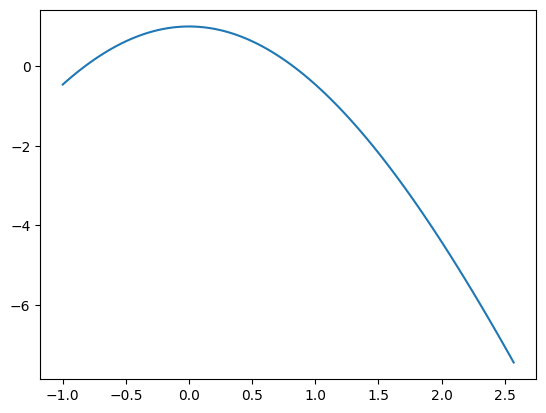

In [34]:
f = lambda x: np.cos(x) - x**2

x = np.linspace(-1 , np.pi/2 +1 , 100)
y = f(x)

dic = {'x' : x , 'f(x)' : y}

df = pd.DataFrame(dic)

raiz = df[abs(df['f(x)']) <= min(abs(df['f(x)']))]

print(f'Los puntos de la funcion son\n\n{df}\n\n y las raices calculadas son \n\n{raiz}\n\n')

plt.plot(x,y)

In [41]:
raiz , i = steffensen(f , 0.5)

print(f'Raiz calcualdo con el metodo de steffeenn {raiz}')

print(bisect(f , 0.5 , 1))
newton(f , 1 , x1=0.5)

Raiz calcualdo con el metodo de steffeenn 0.8241323123025224
0.8241323123020265


np.float64(0.8241323123025224)

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [7]:
# Parte A

def doble_factorial(n):
  '''
  Fumcion que me retorna el (2n-1)!!
  Iniciamos un numero, valor = 1, al cual se le multiplicaran los numeros impares desde 1 hasta 2n-1
  '''

  valor = 1
  for i in range(1, 2*n , 2): # se inicia el ciclo desde 1 y se va de dos en dos, para tomar los numeros impares
    # Luego se multiplica cada i
    valor *=i
  return valor

def coeficiente(n):
  #Se aplica la ecuacion mostrada para calcular el coeficiente c_n
  c_n = (doble_factorial(n)/2**n * factorial(n))**2

  return c_n

In [20]:
L = 1.2
g = 9.8

def periodo(theta_0 ,  n = 3):

  serie = 1
  termino_ant = 0

  for n in range(1 , n+1):

    a = coeficiente(n) * (np.sin(theta_0 / 2))**(2 * n)
    serie += a

  return 2 * np.pi * (L/g)**(1/2) * serie

In [21]:
print("Las siguientes iteraciones son para n = 3")

T1 = periodo(np.pi/2)
T2 = periodo(15 * (np.pi / 180))

print(f'Aproximacion para theta_0 = 90 grados, T = {T1}')
print(f'Para theta_0= 15 grados, T = {T2}')

print()
print("Las siguiente s iteraciones son para n=10")

T3 = periodo(np.pi/2 , 10)
T4 = periodo(15 * (np.pi / 180) , 10)

print(f'theta_0 = 90 grados, T = {T3}')
print(f'theta_0= 15 grados, T = {T4}')

error1 = abs(T1 - T3)/T3
error2 = abs(T2 - T4)/T4

print()
print(f'Errores:')
print(f'theta_0 = 90 grados, error = {error1}')
print(f'theta_0= 15 grados, error = {error2}')

# Se puede apreciar que el error es menor cuado theta es menor (tomando a n=10 como el valor exacto)

Las siguientes iteraciones son para n = 3
Aproximacion para theta_0 = 90 grados, T = 38.49367191150985
Para theta_0= 15 grados, T = 2.210833545269779

Las siguiente s iteraciones son para n=10
theta_0 = 90 grados, T = 1.1561206779188112e+22
theta_0= 15 grados, T = 24547329.239748053

Errores:
theta_0 = 90 grados, error = 1.0
theta_0= 15 grados, error = 0.9999999099358825


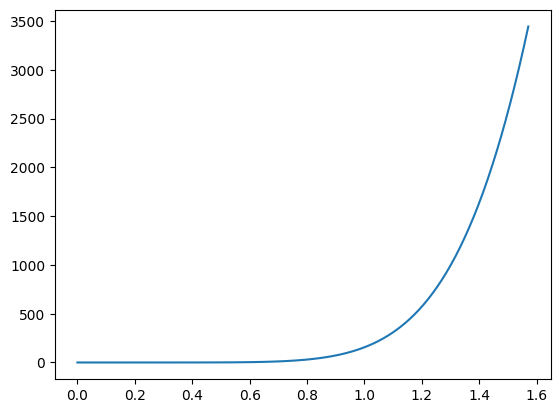

In [44]:
# Parte B
f = lambda x: periodo(x , 4) - 1.1 * np.pi *2 * (L/g)**(1/2)

x = np.linspace(0 , np.pi/2 , 100)
y = f(x)
plt.plot(x , y)

#bisect(f , -1 , )